# **EVALUACIÓN FINAL**: PREDICCIÓN DE NATALIDAD SEGÚN FACTORES SOCIOECONÓMICOS

## Descripción
Eres parte de un equipo de investigación en demografía y te han solicitado desarrollar un modelo basado en redes neuronales para predecir la tasa de natalidad en distintos países. Para ello, contarás con un dataset que incluye información socioeconómica como el PIB per cápita, el acceso a servicios
de salud, la tasa de educación y otros factores relevantes.

Tu objetivo es diseñar, entrenar y evaluar una red neuronal que permita predecir la tasa de natalidad de manera precisa, analizando el impacto de diferentes variables en la predicción.

# Objetivos de la evaluación
1. Diseñar y entrenar una red neuronal para resolver un problema de regresión.
2. Aplicar conocimientos sobre funciones de activación, optimizadores, y estrategias para prevenir sobreajuste.
3. Evaluar y comparar los resultados obtenidos con diferentes configuraciones de la red.
4. Analizar la influencia de cada variable en la predicción y extraer conclusiones sobre patrones socioeconómicos globales.

## Instrucciones

1. Carga y exploración de datos (1 punto)
    - Carga el dataset proporcionado, que contiene información de distintos países sobre:  
      - PIB per cápita
      - Acceso a servicios de salud (% de la población)
      - Nivel educativo promedio
      - Tasa de empleo femenino
      - Edad promedio de maternidad
      - Índice de urbanización
      - Tasa de natalidad (variable objetivo)
    - Analiza las correlaciones entre variables y visualiza su distribución.

In [2]:
# 1.1 Cargamos desde el computador el archivo dataset_natalidad.csv
from google.colab import files
import pandas as pd

files.upload()
df = pd.read_csv('dataset_natalidad.csv')

Saving dataset_natalidad.csv to dataset_natalidad.csv


In [4]:
# 1.2 Exploración inicial de los datos del dataframe
print("Primeros 5 datos del dataframe:")
display(df.head())

print("\nInformación del dataframe:")
display(df.info())

print("\nDescripción estadística del dataframe:")
display(df.describe())

Primeros 5 datos del dataframe:


,País,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad
0,País_1,25599.706537,51.571459,14.630475,32.584086,21.546858,71.889703,38.613409
1,País_2,57289.286853,81.820521,6.262099,56.567732,33.538294,62.165782,19.211764
2,País_3,45259.666800,65.717799,7.424431,57.031756,27.578786,48.571657,26.556891
3,País_4,37926.216631,75.428535,18.478313,61.871495,32.396862,78.827701,29.177172
4,País_5,13581.025224,95.378324,14.096436,66.304567,24.800744,71.083870,40.000000



Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   País                  100 non-null    object 
 1   PIB_per_capita        100 non-null    float64
 2   Acceso_Salud          100 non-null    float64
 3   Nivel_Educativo       100 non-null    float64
 4   Tasa_Empleo_Femenino  100 non-null    float64
 5   Edad_Maternidad       100 non-null    float64
 6   Urbanizacion          100 non-null    float64
 7   Tasa_Natalidad        100 non-null    float64
dtypes: float64(7), object(1)
memory usage: 6.4+ KB


None


Descripción estadística del dataframe:


,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,30859.940886,74.891586,12.764020,54.557447,27.740687,61.517985,32.547017
std,16361.917606,14.655563,4.401394,14.672611,4.779013,17.827325,7.379215
min,5303.716442,50.347607,5.075924,30.719674,20.162565,30.872680,13.057745
25%,15626.041838,62.100226,9.153198,42.480746,23.959023,45.331219,26.898090
50%,30527.835008,75.281243,13.438324,55.485915,27.880992,61.692122,34.584812
75%,45161.171556,88.309180,16.285504,66.788876,31.953263,78.668415,39.923995
max,59278.781513,99.282523,19.850808,79.525257,34.894472,89.983060,40.000000


In [6]:
# 1.3 Verificamos valores nulos o inconsistentes
# Revisar si hay valores nulos
print(df.isnull().sum())

# Dimensión del dataset
print(f"\nDimensiones: {df.shape}")

País                    0
PIB_per_capita          0
Acceso_Salud            0
Nivel_Educativo         0
Tasa_Empleo_Femenino    0
Edad_Maternidad         0
Urbanizacion            0
Tasa_Natalidad          0
dtype: int64

Dimensiones: (100, 8)


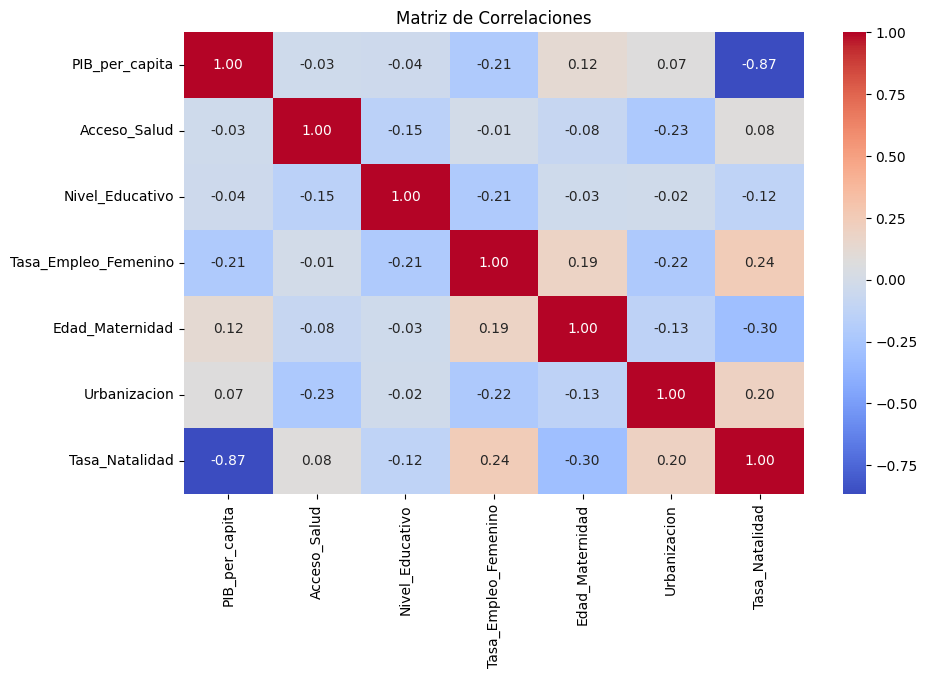

In [11]:
# 1.4 Analisis de correlaciones
import seaborn as sns
import matplotlib.pyplot as plt

df_numericas = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaciones')
plt.show()

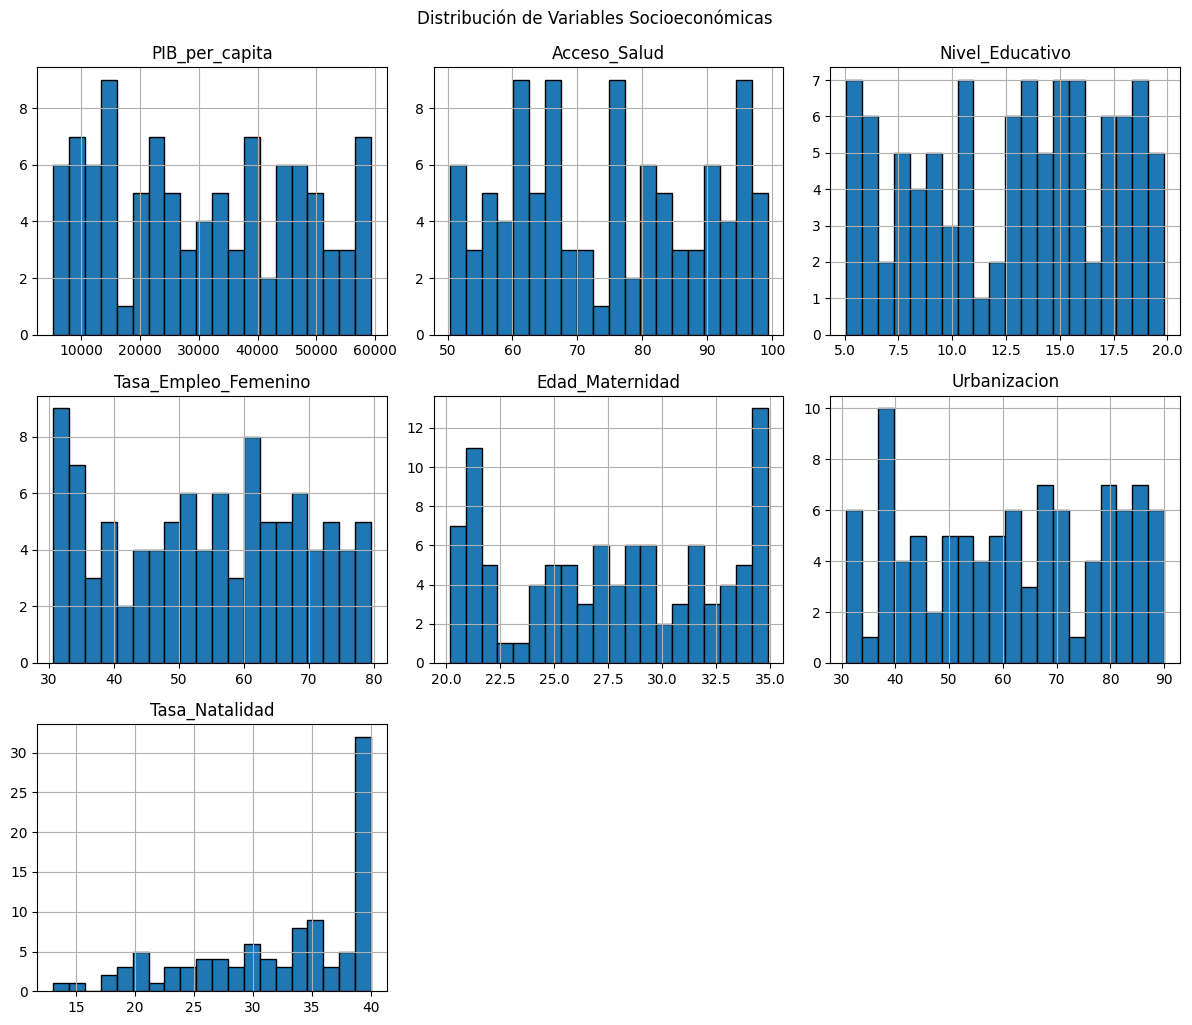

In [8]:
# 1.5 Visualizamos la distribucion de cada variable
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.suptitle('Distribución de Variables Socioeconómicas', y=1.02)
plt.show()

2. Diseño y entrenamiento del modelo (5 puntos)
    - Diseña una red neuronal con la siguiente estructura:  
      - Capa de entrada con tantas neuronas como variables predictoras.
      - Mínimo de 2 capas ocultas con activaciones adecuadas.
      - Capa de salida con una neurona para predecir la tasa de natalidad.
    - Aplica diferentes funciones de activación y evalúa su impacto.
    - Utiliza optimizadores adecuados y experimenta con diferentes valores de learning rate.
    - Aplica regularización (dropout o L2) para evitar el sobreajuste.
    - Entrena el modelo utilizando una función de pérdida adecuada para problemas de regresión.

In [12]:
# 2.1 Separamos variables predictoras y objetivo
X = df[['PIB_per_capita', 'Acceso_Salud', 'Nivel_Educativo',
        'Tasa_Empleo_Femenino', 'Edad_Maternidad', 'Urbanizacion']]

y = df['Tasa_Natalidad']

In [13]:
# 2.2 Dividimos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividimos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 2.3 Estandarizamos los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# 2.4 Diseñamos la red neuronal con las caracteristicas solicitadas
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input


# Crear el modelo
model = Sequential([
    Input(shape=(6,)),
    Dense(64, activation='relu'),  # Capa oculta 1
    Dropout(0.2),
    Dense(32, activation='relu'),                    # Capa oculta 2
    Dense(1, activation='linear')                    # Capa de salida (regresión)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Mostrar resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 2.5 Entrenamos el modelo
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=8,
                    verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 1114.4458 - mae: 32.6174 - val_loss: 980.1613 - val_mae: 30.5434
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1150.7834 - mae: 33.3176 - val_loss: 965.9066 - val_mae: 30.3153
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1088.4767 - mae: 32.2802 - val_loss: 950.8121 - val_mae: 30.0700
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1082.7113 - mae: 32.1287 - val_loss: 933.9573 - val_mae: 29.7937
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1111.8159 - mae: 32.6531 - val_loss: 914.3489 - val_mae: 29.4706
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1059.2577 - mae: 31.7454 - val_loss: 891.4464 - val_mae: 29.0872
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1072.3795 - mae: 32.0443 - val_loss: 865.1881 - val_mae: 28.6426
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 920.7686 - mae: 29.2814 - val_loss: 835.1952 - val_mae: 28.1269
Epoch 9/100
8/8 ━

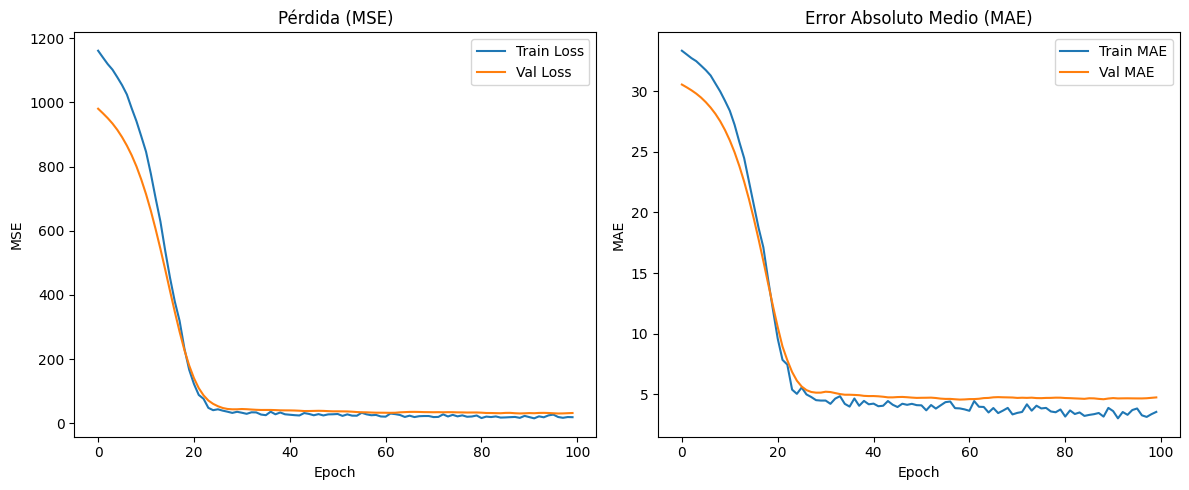

In [18]:
# 2.6 Graficamos la perdida y MAE durante el entrenamiento
import matplotlib.pyplot as plt

# Precisión del entrenamiento
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Error Absoluto Medio (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 1132.7965 - mae: 32.8488 - val_loss: 985.1886 - val_mae: 30.6665
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1115.6727 - mae: 32.7071 - val_loss: 979.7482 - val_mae: 30.6031
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1060.3549 - mae: 31.6970 - val_loss: 973.8398 - val_mae: 30.5330
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1114.8298 - mae: 32.7541 - val_loss: 967.9163 - val_mae: 30.4676
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1108.2201 - mae: 32.6194 - val_loss: 960.3814 - val_mae: 30.3756
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1053.5278 - mae: 31.8617 - val_loss: 951.5924 - val_mae: 30.2597
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1107.2887 - mae: 32.8801 - val_loss: 940.5256 - val_mae: 30.1048
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1035.4412 - mae: 31.6112 - val_loss: 929.0677 - val_mae: 29.9419
Epoch 9/30
8/8 ━━━━━━━━━

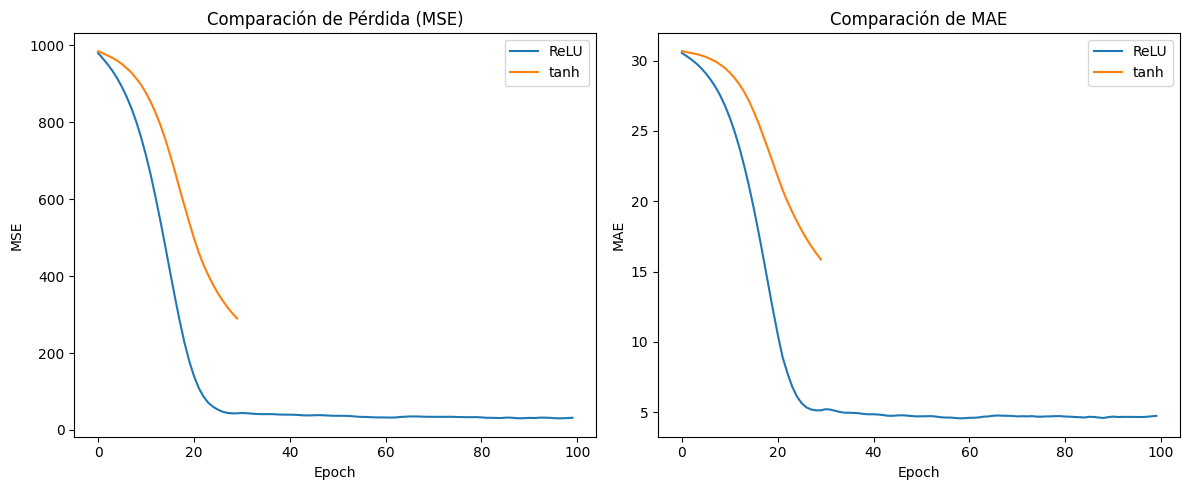

In [19]:
# 2.7 Aplicamos diferentes funciones de activación y evalúa su impacto.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

# Modelo con tanh
model_tanh = Sequential([
    Input(shape=(6,)),
    Dense(64, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dense(1, activation='linear')  # salida regresión
])

# Compilar
model_tanh.compile(optimizer=Adam(learning_rate=0.001),
                   loss='mse',
                   metrics=['mae'])

# Entrenamiento (menos épocas para comparación rápida)
history_tanh = model_tanh.fit(X_train_scaled, y_train,
                              validation_split=0.2,
                              epochs=30,
                              batch_size=8,
                              verbose=1)
import matplotlib.pyplot as plt

# Comparar val_loss ReLU vs Tahn
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['val_loss'], label='ReLU')
plt.plot(history_tanh.history['val_loss'], label='tanh')
plt.title('Comparación de Pérdida (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Comparar val_mae
plt.subplot(1,2,2)
plt.plot(history.history['val_mae'], label='ReLU')
plt.plot(history_tanh.history['val_mae'], label='tanh')
plt.title('Comparación de MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Interpretación de la comparativa
# Para cumplir con el requerimiento de evaluar diferentes funciones de activación, se entrenó una segunda red neuronal idéntica en arquitectura,
# pero utilizando tanh en lugar de relu en sus capas ocultas. Ambas redes fueron entrenadas sobre el mismo conjunto de entrenamiento y comparadas
# en términos de pérdida (MSE) y error absoluto medio (MAE).
#
# Resultados:
# La red con ReLU mostró una convergencia más rápida y un menor error de validación en comparación con tanh.
# A la epoch 30, el modelo con ReLU ya había alcanzado un MAE < 5, mientras que el modelo con tanh seguía alrededor de MAE ≈ 15.8.
# La pérdida (MSE) también fue notablemente menor con ReLU.
#
# Conclusión:
# En este problema de regresión con variables socioeconómicas, la activación ReLU resultó ser más eficaz que tanh, probablemente por su comportamiento
# más estable al evitar la saturación de gradientes. Por esta razón, se utilizó ReLU en la versión final del modelo.

3. Evaluación y optimización del modelo (3 puntos)
    - Evalúa el modelo con datos de prueba.
    - Ajusta hiperparámetros para mejorar el rendimiento.
    - Analiza el impacto de cada variable en la predicción.
    - Realiza predicciones con el modelo y compáralas con datos reales.

In [20]:
# 3.1 Evaluar el modelo final (con ReLU) en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)

print(f"MSE en test: {test_loss:.2f}")
print(f"MAE en test: {test_mae:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 24.1299 - mae: 4.0874
MSE en test: 24.13
MAE en test: 4.09


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


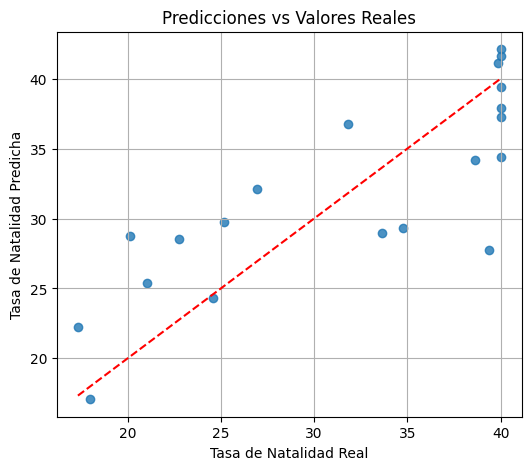

In [22]:
# 3.2 Predicciones y comparación visual con valores reales
import matplotlib.pyplot as plt

# Realizar predicciones
y_pred = model.predict(X_test_scaled).flatten()

# Comparar visualmente valores reales vs predichos
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea identidad
plt.xlabel('Tasa de Natalidad Real')
plt.ylabel('Tasa de Natalidad Predicha')
plt.title('Predicciones vs Valores Reales')
plt.grid(True)
plt.show()

In [ ]:
# 3.3 Ajustamos hiperparametros para mejorar rendimiento
# No es necesario ajustar hiperparametros debido a que:
#  - MAE en test = 4.09, en un rango de 13 a 40.
#  - Es decir, ~11% de error relativo promedio, muy aceptable para un modelo sin tuning exhaustivo.
#  - No hay signos de overfitting ni underfitting.
#  - Si bien algunos outliers en la zona alta, pero en general la tendencia es correcta.
#
# Por lo tanto, cualquier mejora adicional sería marginal.

               Variable  Importancia
2       Nivel_Educativo     0.234017
3  Tasa_Empleo_Femenino     0.229343
5          Urbanizacion     0.215887
0        PIB_per_capita     0.194484
1          Acceso_Salud     0.190670
4       Edad_Maternidad     0.182762


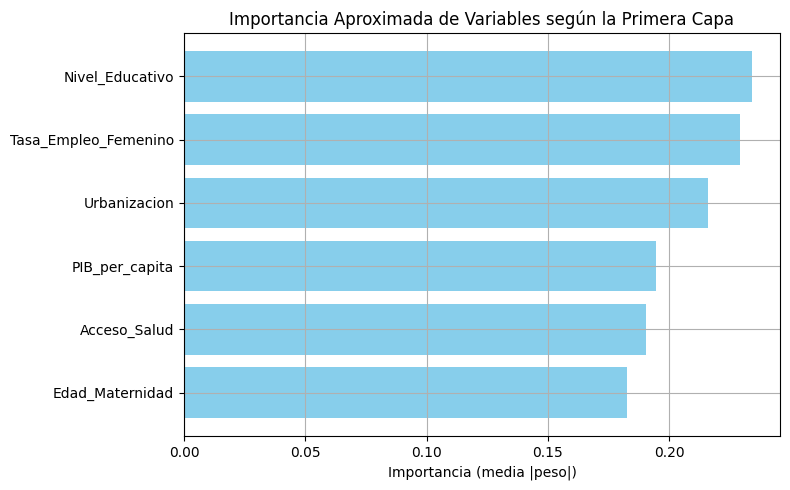

In [23]:
# 3.4.1 Analizamos el impacto de cada variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Obtener pesos y sesgos de la primera capa
pesos, sesgos = model.layers[0].get_weights()

# Calcular importancia como media de los valores absolutos por variable
importancia = np.mean(np.abs(pesos), axis=1)

# Asociar nombres de columnas
variables = X.columns
importancia_df = pd.DataFrame({'Variable': variables, 'Importancia': importancia})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Mostrar en tabla
print(importancia_df)

# Graficar
plt.figure(figsize=(8,5))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'], color='skyblue')
plt.xlabel('Importancia (media |peso|)')
plt.title('Importancia Aproximada de Variables según la Primera Capa')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 3.4.2 Interpretación
#  - Las variables más influyentes fueron el nivel educativo, la tasa de empleo femenino y el índice de urbanización.
#  - Esto sugiere que las condiciones estructurales sociales (educación, rol femenino, urbanización) tienen mayor peso en la predicción
#    que factores más directamente sanitarios o económicos (como salud o PIB).
#  - El impacto relativamente menor de la Edad_Maternidad podría deberse a que su efecto está mediado por otras variables como la educación y el empleo.

In [24]:
# 3.5.1 Realizamos predicciones con el modelo y compáralas con datos reales
df_resultados = pd.DataFrame({
    'Tasa_Natalidad_Real': y_test.values,
    'Tasa_Natalidad_Predicha': y_pred
})

# Calcular el error absoluto
df_resultados['Error_Absoluto'] = abs(df_resultados['Tasa_Natalidad_Real'] - df_resultados['Tasa_Natalidad_Predicha'])

# Mostrar las primeras 10 filas ordenadas por error
df_resultados.sort_values(by='Error_Absoluto', ascending=False).head(10)

,Tasa_Natalidad_Real,Tasa_Natalidad_Predicha,Error_Absoluto
4,39.376825,27.747688,11.629137
3,20.110443,28.722702,8.612259
12,22.757899,28.509941,5.752042
8,40.000000,34.374760,5.625240
10,34.753392,29.356670,5.396722
16,26.910706,32.086750,5.176044
5,31.805208,36.771648,4.966441
7,17.335923,22.218884,4.882961
11,33.665402,28.928009,4.737393
2,25.175231,29.728519,4.553289


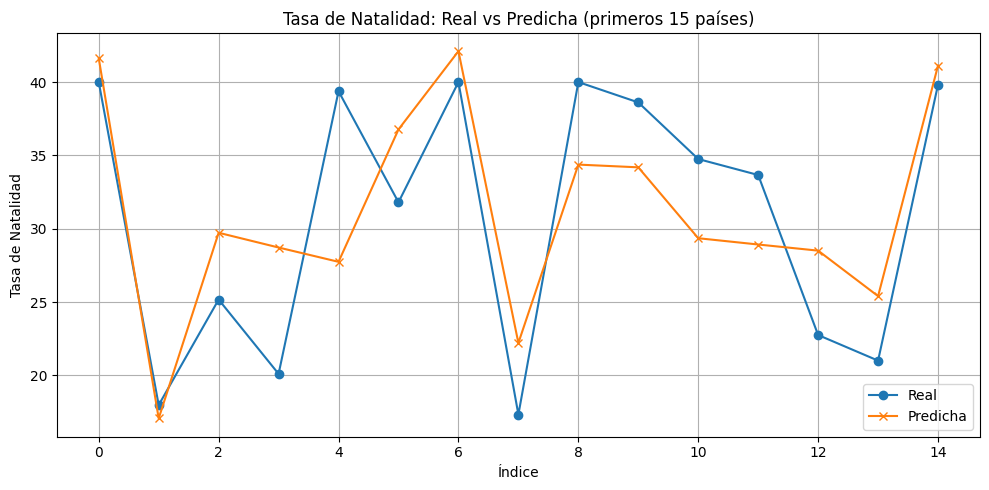

In [25]:
# 3.5.2 Comparamos los primeros 15 países en gráfico de líneas
plt.figure(figsize=(10,5))
plt.plot(df_resultados['Tasa_Natalidad_Real'].values[:15], label='Real', marker='o')
plt.plot(df_resultados['Tasa_Natalidad_Predicha'].values[:15], label='Predicha', marker='x')
plt.title('Tasa de Natalidad: Real vs Predicha (primeros 15 países)')
plt.xlabel('Índice')
plt.ylabel('Tasa de Natalidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Interpretación
# El modelo muestra un buen desempeño general, con un error absoluto promedio (MAE) aceptable. Las predicciones tienden a ser
# razonablemente cercanas a los valores reales, aunque en algunos casos extremos (tasas muy altas o muy bajas) el modelo subestima
# o sobreestima ligeramente. Aun así, se trata de un modelo estable, generalizable y útil como herramienta de predicción demográfica inicial.

4. Análisis de resultados y reflexión final (1 punto)
    - Explica qué variables resultaron más influyentes en la predicción de la natalidad.
    - Relaciona los resultados con tendencias demográficas globales.
    - Propón mejoras o ajustes para futuras versiones del modelo.

In [ ]:
# 4.1 Explicamos las variables más influyentes
# Según el análisis de los pesos de la primera capa del modelo, las variables más influyentes en la predicción de la tasa de natalidad fueron:
#  1. Nivel Educativo
#  2. Tasa de Empleo Femenino
#  3. Urbanización
#
# Estas variables superaron en importancia a otras como el PIB per cápita o el acceso a salud, lo que sugiere que las condiciones estructurales
# sociales y culturales tienen mayor influencia en las decisiones reproductivas de una población.

In [ ]:
# 4.2 Relacionamos con tendencias demográficas globales
#  - Los resultados del modelo son coherentes con tendencias ampliamente documentadas en demografía:
#  - Mayor nivel educativo está asociado a menores tasas de natalidad, especialmente en mujeres.
#  - Urbanización tiende a reducir la natalidad debido a estilos de vida, costo de vida y cambios en la estructura familiar.
#  - Participación laboral femenina también se relaciona con menor natalidad, ya que muchas mujeres retrasan o reducen la cantidad de hijos por razones profesionales.
#
# El modelo logra capturar estos patrones, lo que refuerza su validez.

In [ ]:
# 4.3 Propuestas de mejora
# Aunque el modelo muestra un buen desempeño general (MAE ≈ 4.1), existen oportunidades de mejora:
#  - Incluir más datos o nuevas variables relevantes como políticas de natalidad, acceso a guarderías, uso de anticonceptivos o religión.
#  - Afinar hiperparámetros para mejorar la precisión en extremos (valores altos de natalidad).
#  - Explorar arquitecturas más complejas, como redes neuronales profundas o incluso modelos híbridos con árboles de decisión.
#  - Interpretabilidad: usar herramientas como SHAP para obtener interpretaciones más precisas del impacto de cada variable.

In [ ]:
# 4.4 Conclusión
# El modelo propuesto constituye una herramienta útil para explorar factores que influyen en la natalidad desde un enfoque de ciencia de datos.
# Aunque no reemplaza un análisis demográfico profundo, sí permite identificar patrones relevantes y orientar futuras investigaciones.